In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1 사용

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2를 비활성화하고 v1 활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [3]:
# tensor  = data(상수, 변수)와 연산
node1 = tf.constant("Hello Tensorflow")
sess = tf.Session()
print(sess.run(node1))

b'Hello Tensorflow'


In [4]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16) # 기본값 : tf.float64
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [5]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [6]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [7]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1]) # 평균 0, 표준편차 1인 난수 실수 1개(정규분포 이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a, b])

[array([0.94047904], dtype=float32), array([-1.9625645], dtype=float32)]

In [8]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([0.21682273], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현

## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [9]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias를 처음엔 랜덤 세팅, 학습과정에서 변경
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
# cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 w, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분 값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습(v2에서는 fit함수)
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:10.99035358428955, W:[0.1868062], b:[-0.2481311]
200번째 cost:0.030635325238108635, W:[1.2027974], b:[0.5389943]
400번째 cost:0.011698071844875813, W:[1.1253165], b:[0.71512645]
600번째 cost:0.004466889891773462, W:[1.0774379], b:[0.82396567]
800번째 cost:0.0017056759679690003, W:[1.0478519], b:[0.89122146]
1000번째 cost:0.0006513156113214791, W:[1.0295696], b:[0.9327812]
1200번째 cost:0.0002487008459866047, W:[1.0182722], b:[0.958463]
1400번째 cost:9.496890561422333e-05, W:[1.0112913], b:[0.9743324]
1600번째 cost:3.626243051257916e-05, W:[1.0069773], b:[0.9841392]
1800번째 cost:1.3847121408616658e-05, W:[1.0043116], b:[0.9901988]
2000번째 cost:5.288074589770986e-06, W:[1.0026644], b:[0.99394333]
2200번째 cost:2.019630983340903e-06, W:[1.0016466], b:[0.9962569]
2400번째 cost:7.716423624515301e-07, W:[1.0010177], b:[0.9976863]
2600번째 cost:2.951512954041391e-07, W:[1.0006295], b:[0.99856913]
2800번째 cost:1.1301671065666596e-07, W:[1.0003897], b:[0.99911475]
3000번째 cost:4.336423842232762e-08, W:[1.000241

In [10]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [11]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [12]:
def predict(x):
    return W_[0]*x + b_[0]

In [13]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?1
예측값은  1.9999898076057434


## 2.2 predict를 위한 placeholder 이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [14]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [15]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],feed_dict={x:x_data,y:y_data})
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:87.37479400634766, W:[0.8867816], b:[0.63274854]
200번째 cost:0.0007023613434284925, W:[2.0090127], b:[0.9518272]
400번째 cost:6.908357318025082e-05, W:[2.0028267], b:[0.9848919]
600번째 cost:6.795175522711361e-06, W:[2.0008864], b:[0.99526143]
800번째 cost:6.683727633571834e-07, W:[2.000278], b:[0.99851376]
1000번째 cost:6.586196832358837e-08, W:[2.0000873], b:[0.9995336]
1200번째 cost:6.509026206913404e-09, W:[2.0000274], b:[0.99985355]
1400번째 cost:6.578375066901287e-10, W:[2.0000088], b:[0.9999537]
1600번째 cost:7.862581419271208e-11, W:[2.000003], b:[0.9999841]
1800번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2200번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000번째 cost:2.060005464821213e-11, W:[2.000

In [16]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [17]:
sess.run(H, feed_dict={x:np.array([5,6,7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale 조정x)

In [18]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,5,68,80,95])
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],feed_dict={x:x_data,y:y_data})
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:3745.07275390625, W:[7.874836], b:[0.79388154]
200번째 cost:114.41070556640625, W:[10.549669], b:[-4.0030155]
400번째 cost:113.06085205078125, W:[10.756898], b:[-5.537393]
600번째 cost:112.93697357177734, W:[10.819666], b:[-6.002146]
800번째 cost:112.92562103271484, W:[10.838677], b:[-6.1429157]
1000번째 cost:112.92460632324219, W:[10.844437], b:[-6.1855536]
1200번째 cost:112.92451477050781, W:[10.846181], b:[-6.1984696]
1400번째 cost:112.92448425292969, W:[10.846709], b:[-6.2023807]
1600번째 cost:112.92449951171875, W:[10.8468685], b:[-6.2035666]
1800번째 cost:112.92451477050781, W:[10.846917], b:[-6.2039213]
2000번째 cost:112.92449951171875, W:[10.846932], b:[-6.2040367]
2200번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
2400번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
2600번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
2800번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
3000번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
3200번째 cost:112.9244995117187

In [19]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(scale 조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0 ~ 1 사이로 조정
                     X-Xmin
    normalization = ㅡㅡㅡㅡㅡㅡ
                    Xmax-Xmin
            * 위 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.MinMaxScaler 이용)
- standardization(표준화) :  평균 0, 표준편차 1로 조정
                        X-Xmean(평균)
    standardization = ---------------
                        Xstd(표준편차)
            * 위 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.StandardScaler 이용)

In [20]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,5,68,80,95])
scaled_x_data = (x_data-x_data.min()) / (x_data.max()-x_data.min())
scaled_y_data = (y_data-y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.02173913 0.70652174 0.83695652 1.        ]


In [21]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler 이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,5,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화 시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+00, 1.11111111e-01, 2.17391304e-02],
       [5.00000000e+00, 6.80000000e+01, 4.44444444e-01, 7.06521739e-01],
       [8.00000000e+00, 8.00000000e+01, 7.77777778e-01, 8.36956522e-01],
       [1.00000000e+01, 9.50000000e+01, 1.00000000e+00, 1.00000000e+00]])

In [22]:
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x:scaled_x_data,
                                             y:scaled_y_data})
    if step%600 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:0.09075808525085449, W:[0.33572134], b:[0.3253986]
600번째 cost:0.0679238811135292, W:[0.4505189], b:[0.32345703]
1200번째 cost:0.054413922131061554, W:[0.53468484], b:[0.29212847]
1800번째 cost:0.04438682645559311, W:[0.6043692], b:[0.25825801]
2400번째 cost:0.03681458905339241, W:[0.6641804], b:[0.22732326]
3000번째 cost:0.031089644879102707, W:[0.7160137], b:[0.20009252]
3600번째 cost:0.026761021465063095, W:[0.76104563], b:[0.17633998]
4200번째 cost:0.023488154634833336, W:[0.80019367], b:[0.15566963]
4800번째 cost:0.021013515070080757, W:[0.8342328], b:[0.13769218]
5400번째 cost:0.019142422825098038, W:[0.8638308], b:[0.12205929]
6000번째 cost:0.017727674916386604, W:[0.8895677], b:[0.1084655]
6600번째 cost:0.016657963395118713, W:[0.91194713], b:[0.09664503]
7200번째 cost:0.01584915816783905, W:[0.9314067], b:[0.08636661]
7800번째 cost:0.015237616375088692, W:[0.9483278], b:[0.07742916]
8400번째 cost:0.014775221236050129, W:[0.9630416], b:[0.0696576]
9000번째 cost:0.014425602741539478, W:[0.97583574]

In [23]:
# 예측
scaled_input = scaler_x.transform(np.array([[2],
                                           [3]]))
print("모델 예측을 위한 입력 : ", scaled_input, sep="\n")
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print("모델 예측 결과 : ", scaled_output, sep="\n")
print("결과 : ", scaler_y.inverse_transform(scaled_output), sep="\n")

모델 예측을 위한 입력 : 
[[0.11111111]
 [0.22222222]]
모델 예측 결과 : 
[[0.15343982]
 [0.26663095]]
결과 : 
[[17.116465]
 [27.530046]]


In [24]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

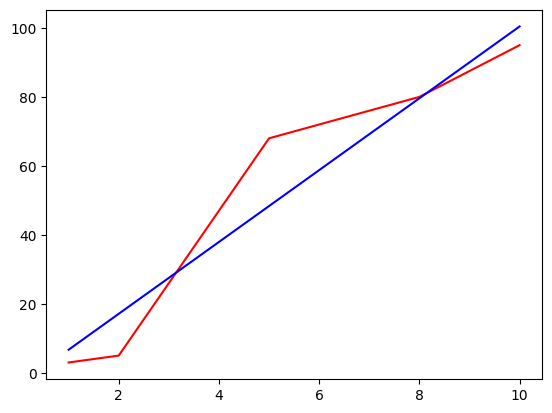

In [25]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [26]:
# 라이브러리를 이용하여 표준화(standardScaler 이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,5,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2  5]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.22009861]
 [-0.93313895 -1.16839952]
 [-0.05832118  0.46012193]
 [ 0.81649658  0.77031649]
 [ 1.39970842  1.1580597 ]]


In [27]:
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x:scaled_x_data,
                                             y:scaled_y_data})
    if step%600 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:4.6017022132873535, W:[-1.108739], b:[-0.47131371]
600번째 cost:0.48508232831954956, W:[0.33872715], b:[-0.14178649]
1200번째 cost:0.11252722889184952, W:[0.77417225], b:[-0.04265394]
1800번째 cost:0.07881102710962296, W:[0.9051679], b:[-0.0128317]
2400번째 cost:0.075759656727314, W:[0.94457614], b:[-0.00386019]
3000번째 cost:0.07548351585865021, W:[0.9564313], b:[-0.00116127]
3600번째 cost:0.07545852661132812, W:[0.95999765], b:[-0.00034935]
4200번째 cost:0.07545626163482666, W:[0.96107054], b:[-0.00010509]
4800번째 cost:0.07545606791973114, W:[0.96139306], b:[-3.161607e-05]
5400번째 cost:0.07545603811740875, W:[0.96149], b:[-9.510669e-06]
6000번째 cost:0.07545603811740875, W:[0.9615172], b:[-2.8547952e-06]
6600번째 cost:0.07545603811740875, W:[0.9615172], b:[-8.427286e-07]
7200번째 cost:0.07545603811740875, W:[0.9615172], b:[-2.3860494e-07]
7800번째 cost:0.07545604556798935, W:[0.9615172], b:[-5.2921482e-08]
8400번째 cost:0.07545603811740875, W:[0.9615172], b:[-8.262546e-09]
9000번째 cost:0.0754560381174

In [28]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

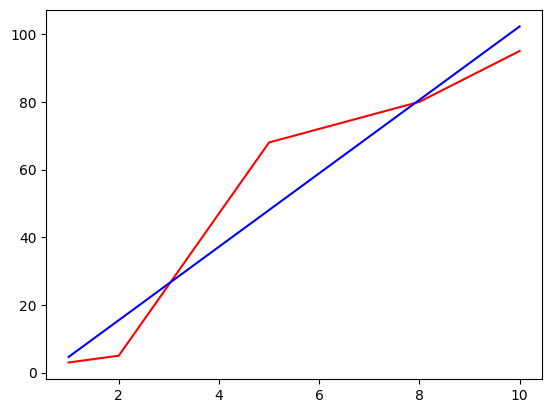

In [29]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2. 5 입력(독립)변수 x가 3개, 타겟(종속)변수 y가 1개 (csv이용)

In [30]:
# 방법 1 : csv -> array
import numpy as np
# data = np.loadtxt('data/ozone.csv', delimiter=',', encoding='utf-8') # 결측치, header 없어야함
data = np.genfromtxt('data/ozone.csv',
                     delimiter = ',',
                     skip_header=1,
                     missing_values='NA',
                     filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [31]:
# 방법 2 : csv -> 데이터프레임 -> 결측치 처리 -> numpy배열 -> 머신러닝
import pandas as pd
data = pd.read_csv('data/ozone.csv')
data.info() # Ozone, Solar.R열에만 결측치
data.isna().sum() # 열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [32]:
# 2. 결측치 처리
#  결측치 처리 방법 1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0, inplace=True)
#  결측치 처리 방법 2: 결측치 대체(열별 평균값으로 대체)
data.mean() # 열별 평균
# data.fillna(value=data.mean(), inplace=True)
#  결측치 처리 방법 3: 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone', 'Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 : ', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 :  23.615384615384617


In [33]:
# 결측치가 있는 데이터
data[data['Ozone'].isna() | data['Solar.R'].isna()].head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5


In [34]:
def fill_nan(row) :
#     print(row['Ozone'], row['Solar.R'])
#     print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
#     if np.isna(row['Ozone']) : 
    pd.options.mode.copy_on_write = True
#     row = row.copy()
    if row.isna()['Ozone'] : 
        row['Ozone'] = mean_data.loc[int(row.Month), 'Ozone']
    if row.isna()['Solar.R'] : 
        row['Solar.R'] = mean_data.loc[int(row['Month']), 'Solar.R']
    return row
fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [35]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']].values # 독립변수
y_data = data[['Ozone']].values # 타겟변수
X_data.shape, y_data.shape

((153, 3), (153, 1))

In [48]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수 1개인 모델의 weight, bias 지정
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 10001) : 
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                     y:y_data})
    if step%1000 == 0 :
        print("{}번째 cost : {}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                      sess.run(W),
                                      sess.run(b)))        

1000번째 cost : 624.6262817382812
2000번째 cost : 544.4588012695312
3000번째 cost : 504.26898193359375
4000번째 cost : 484.1187744140625
5000번째 cost : 474.013427734375
6000번째 cost : 468.94342041015625
7000번째 cost : 466.39727783203125
8000번째 cost : 465.1163330078125
9000번째 cost : 464.4695129394531
10000번째 cost : 464.140625
최종 cost:464.140625, W:[[ 0.05520353]
 [-3.4884179 ]
 [ 0.8260968 ]], b:[1.5328572]


In [52]:
np.column_stack([X_data,y_data])[:3]

array([[190. ,   7.4,  67. ,  41. ],
       [118. ,   8. ,  72. ,  36. ],
       [149. ,  12.6,  74. ,  12. ]])

In [56]:
# 예측하기
input_data = np.array([[118. ,   8. ,  72.]]) # 41
sess.run(H, feed_dict={X:input_data})

array([[39.618496]], dtype=float32)

### 스케일 조정
```
- MinMaxScaler, StandardScaler<br>
    0~1           -2 ~ 2, 주로 0근처
```

In [66]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)
scaled_X_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [67]:
np.column_stack([scaled_X_data, scaled_y_data])[:2]

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084]])

In [71]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수 1개인 모델의 weight, bias 지정
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 60001) : 
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_X_data,
                                                     y:scaled_y_data})
    if step%1000 == 0 :
        print("{}번째 cost : {}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                      sess.run(W),
                                      sess.run(b)))        

1000번째 cost : 1.7655103206634521
2000번째 cost : 1.686294436454773
3000번째 cost : 1.6124582290649414
4000번째 cost : 1.5436649322509766
5000번째 cost : 1.4795252084732056
6000번째 cost : 1.4197369813919067
7000번째 cost : 1.3639894723892212
8000번째 cost : 1.3120055198669434
9000번째 cost : 1.263529658317566
10000번째 cost : 1.2183136940002441
11000번째 cost : 1.176140546798706
12000번째 cost : 1.1367909908294678
13000번째 cost : 1.1000736951828003
14000번째 cost : 1.0657970905303955
15000번째 cost : 1.0338068008422852
16000번째 cost : 1.0039308071136475
17000번째 cost : 0.9760260581970215
18000번째 cost : 0.9499698281288147
19000번째 cost : 0.9256193041801453
20000번째 cost : 0.9028571844100952
21000번째 cost : 0.8815760612487793
22000번째 cost : 0.861677885055542
23000번째 cost : 0.8430643677711487
24000번째 cost : 0.825645923614502
25000번째 cost : 0.8093374967575073
26000번째 cost : 0.7940662503242493
27000번째 cost : 0.7797586917877197
28000번째 cost : 0.7663465738296509
29000번째 cost : 0.753776490688324
30000번째 cost : 0.741978406906

In [79]:
# 예측하기
input_data = np.array([[149. ,  12.6,  74.]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

array([[113.312]], dtype=float32)

# 3. 이진분류 = logistic Regression(분류분석)
- logistic 회귀분석 : 기존의 회귀분석과 다른 처리 필요

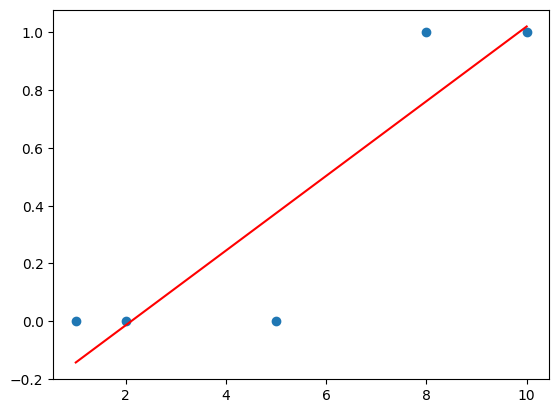

In [80]:
x = np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1]) # 실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

In [81]:
# 교안 50p
import numpy as np
X_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0]])
# tensorflow 구현 (tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 8001) :
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                     y:y_data})
    if step%800 == 0 :
        print("{}번째 cost : {} ".format(step, cost_val))

800번째 cost : 0.35580867528915405 
1600번째 cost : 0.3097791075706482 
2400번째 cost : 0.2811558246612549 
3200번째 cost : 0.26122021675109863 
4000번째 cost : 0.24628256261348724 
4800번째 cost : 0.23447854816913605 
5600번째 cost : 0.22477330267429352 
6400번째 cost : 0.21654854714870453 
7200번째 cost : 0.20941242575645447 
8000번째 cost : 0.20310458540916443 


In [83]:
# 모델 사용
input_data = np.array([[10,0]])
predict = tf.cast(H>=0.5, dtype=tf.float32)
sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

In [85]:
# accuracy
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                             y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 : ',sess.run(accuracy, feed_dict={X:X_data,
                                                   y:y_data}))

모델 정확도 :  0.85714287


# 4. XOR

In [94]:
X_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개 W, b
W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 20001) :
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                     y:y_data})
    if step%1000==0 :
        print("{}번째 cost:{}".format(step,cost_val))

1000번째 cost:0.7304019331932068
2000번째 cost:0.7063995599746704
3000번째 cost:0.698081910610199
4000번째 cost:0.6950706243515015
5000번째 cost:0.6939296722412109
6000번째 cost:0.6934768557548523
7000번째 cost:0.6932896375656128
8000번째 cost:0.6932099461555481
9000번째 cost:0.6931751370429993
10000번째 cost:0.693159818649292
11000번째 cost:0.693152904510498
12000번째 cost:0.693149745464325
13000번째 cost:0.6931483745574951
14000번째 cost:0.6931477785110474
15000번째 cost:0.6931474208831787
16000번째 cost:0.6931473016738892
17000번째 cost:0.6931471824645996
18000번째 cost:0.6931471824645996
19000번째 cost:0.6931471824645996
20000번째 cost:0.6931471824645996


In [95]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                             y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 : ',sess.run(accuracy, feed_dict={X:X_data,
                                                   y:y_data}))

모델 정확도 :  0.75


# 5. Deep Learning XOR 예제

In [99]:
X_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# Layer1 : (입력2, 출력4)
W = tf.Variable(tf.random.normal([2,4]))
b = tf.Variable(tf.random.normal([4]))
# H
layer1 = tf.nn.relu(tf.matmul(X, W) + b)

# layer2 : (입력4, 출력)
W2 = tf.Variable(tf.random.normal([4,1]))
b2 = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(layer1, W2) + b2
H      = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 20001) :
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                     y:y_data})
    if step%1000==0 :
        print("{}번째 cost:{}".format(step,cost_val))

1000번째 cost:0.5217011570930481
2000번째 cost:0.37308043241500854
3000번째 cost:0.23528286814689636
4000번째 cost:0.1611735224723816
5000번째 cost:0.11577004194259644
6000번째 cost:0.08725269138813019
7000번째 cost:0.06850939244031906
8000번째 cost:0.05560314655303955
9000번째 cost:0.04633837938308716
10000번째 cost:0.03945792466402054
11000번째 cost:0.034191593527793884
12000번째 cost:0.030057262629270554
13000번째 cost:0.026735976338386536
14000번째 cost:0.02402288094162941
15000번째 cost:0.02176915854215622
16000번째 cost:0.019874559715390205
17000번째 cost:0.01825851760804653
18000번째 cost:0.016870100051164627
19000번째 cost:0.015663571655750275
20000번째 cost:0.014608711935579777


In [100]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                             y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 : ',sess.run(accuracy, feed_dict={X:X_data,
                                                   y:y_data}))

모델 정확도 :  1.0


## layer x_data 2개 => 4 => 1을
## layer x_data 2개 -> 10 -> 20 -> 10 -> 1
                       입력층  hidden layer(relu)  출력층(sigmoid)

In [109]:
X_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Layer1 : (입력2, 출력10)
W = tf.Variable(tf.random.normal([2,10]))
b = tf.Variable(tf.random.normal([10]))
# H
layer1 = tf.nn.relu(tf.matmul(X, W) + b)

# layer2 : (입력10, 출력20)
W2 = tf.Variable(tf.random.normal([10, 20]))
b2 = tf.Variable(tf.random.normal([20]))
# H
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3 : (입력20, 출력10)
W3 = tf.Variable(tf.random.normal([20, 10]))
b3 = tf.Variable(tf.random.normal([10]))
# H
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4 : (입력10, 출력 1)
W4 = tf.Variable(tf.random.normal([10,1]))
b4 = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(layer3, W4) + b4
H      = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 21) :
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                     y:y_data})
    if step%10==0 :
        print("{}번째 cost:{}".format(step,cost_val))

10번째 cost:0.5328382849693298
20번째 cost:0.23459483683109283


In [110]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                             y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 : ',sess.run(accuracy, feed_dict={X:X_data,
                                                   y:y_data}))

모델 정확도 :  1.0
